### 1.EDA

#### a.Load the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.shape

(178, 14)

#### b.Examine the distribution features

##### Histogram

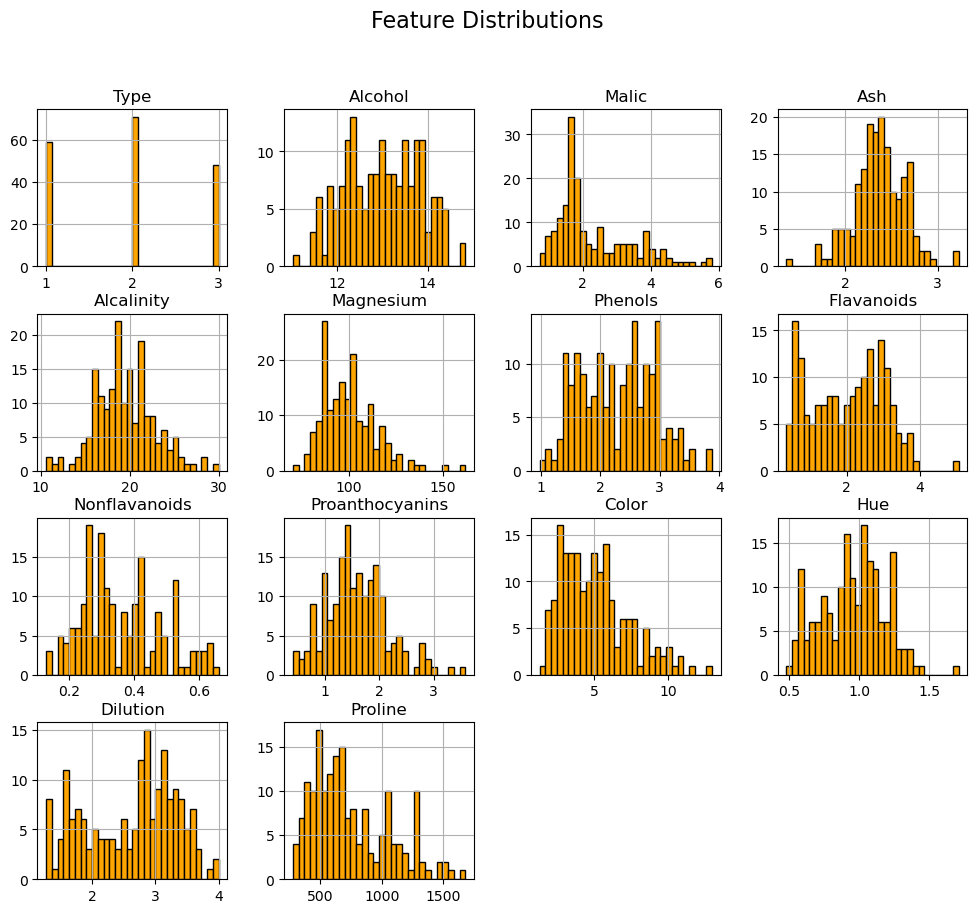

In [7]:
df.hist(figsize=(12, 10), bins=30, color='orange',edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

##### Boxplot 

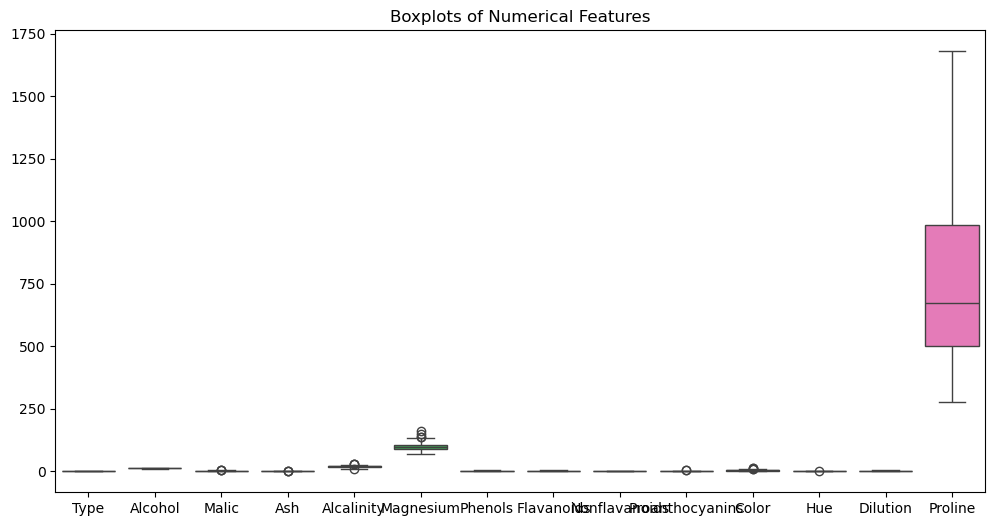

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title("Boxplots of Numerical Features")
plt.show()

##### Density plot

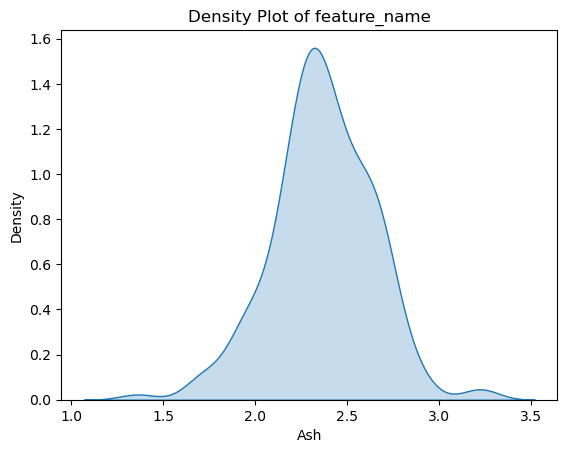

In [9]:
sns.kdeplot(df['Ash'], fill=True)
plt.title("Density Plot of feature_name")
plt.show()

 #### Investigate coorelations between features

compute correlation matrix

In [10]:
corr = df.corr(numeric_only=True)

Dispaly correlation heatmap

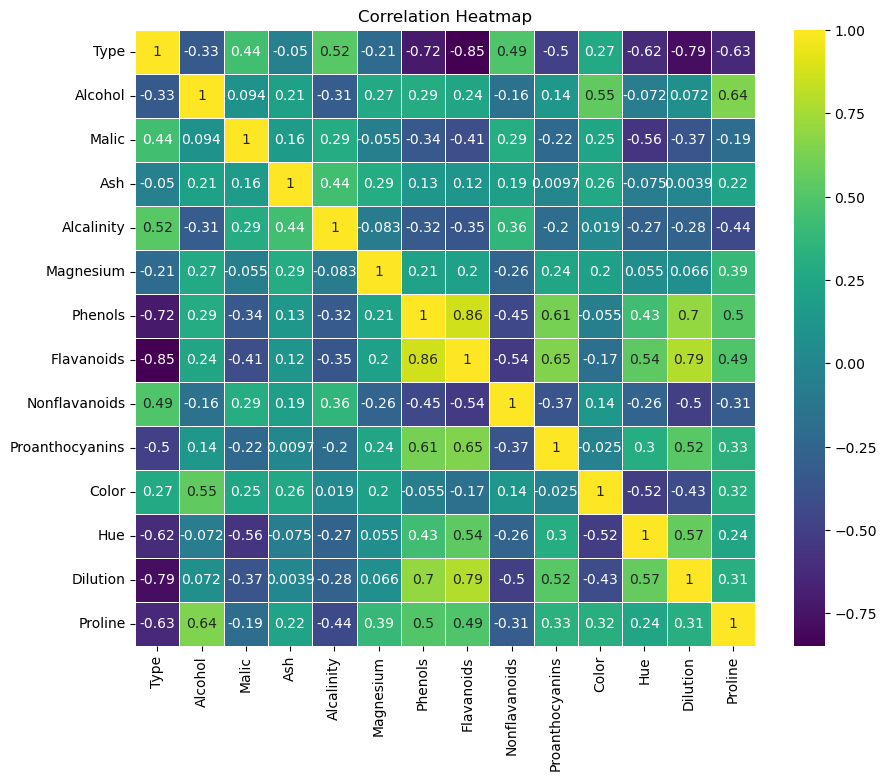

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

###  2 Dimensionality Reduction with PCA 


#### a. Standardize the fatures

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df = df.select_dtypes(include=['float64', 'int64']) 

In [18]:
scaler = StandardScaler()
x_scaled_data = scaler.fit_transform(df)
x_scaled_data

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [22]:
print("Shape before scaling:", x_scaled_data.shape)
print("Shape after scaling:", x_scaled_data.shape)


Shape before scaling: (178, 14)
Shape after scaling: (178, 14)


#### b.Apply PCA

In [23]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()
pca.fit(x_scaled_data)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [29]:
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


Explained variance ratio: [0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


#### c. Determine the Optimal Number of Components

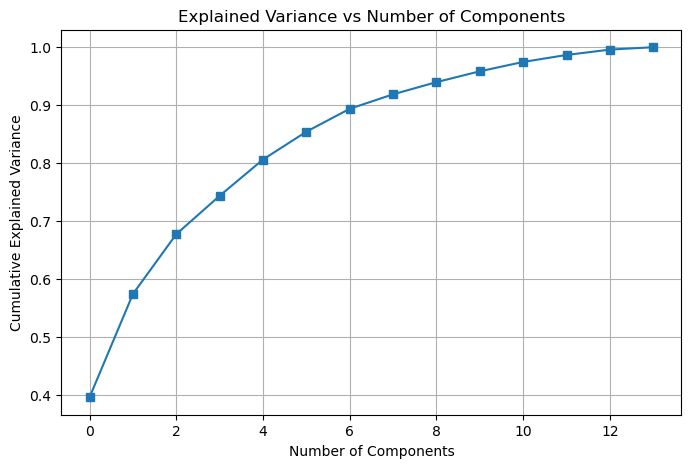

In [30]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='s')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()

#### d. Transform the Dataset into Principal Components

In [31]:
pca = PCA(n_components=0.95)
x_pca = pca.fit_transform(x_scaled_data)

print("Original shape:", x_scaled_data.shape)
print("Reduced shape:", x_pca.shape)


Original shape: (178, 14)
Reduced shape: (178, 10)


### 3.Clustering with original data

#### a. K-Means

In [39]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [40]:
 #Use the standardized original data (not PCA-reduced)

In [41]:
x_cluster = x_scaled_data

In [42]:
# Choose number of clusters (k). You can experiment with 2–10.

In [43]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(x_cluster)

C:\Users\ranju\AppData\Roaming\Python\Python313\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [44]:
labels = kmeans.labels_
labels
print("Cluster labels:", labels[:10])

Cluster labels: [2 2 2 2 2 2 2 2 2 2]


#### b. Visualize the Clustering Results

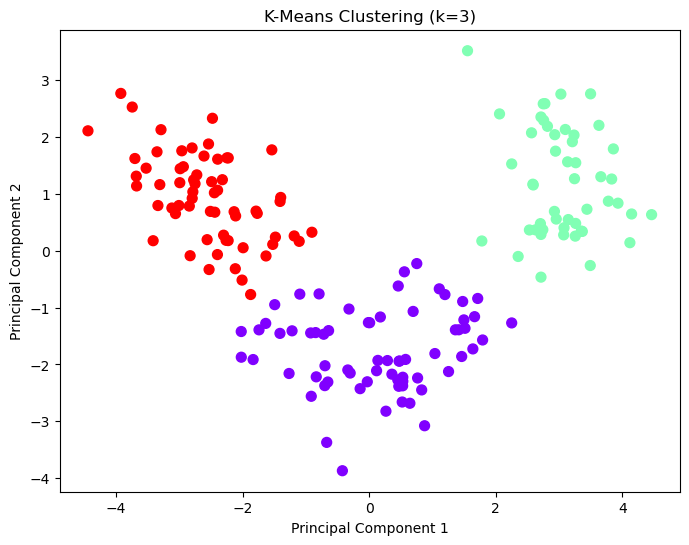

In [45]:
pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_cluster)

plt.figure(figsize=(8,6))
plt.scatter(x_2d[:,0], x_2d[:,1], c=labels, cmap='rainbow', s=50)
plt.title(f'K-Means Clustering (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Evaluate ClusteringPerformance

In [46]:
sil_score = silhouette_score(x_cluster, labels)
print("Silhouette Score:", sil_score)
db_index = davies_bouldin_score(x_cluster, labels)
print("Davies–Bouldin Index:", db_index)

Silhouette Score: 0.30648398324833453
Davies–Bouldin Index: 1.315707552261773


### 4. Clustering with PCA-Transformed Data

#### a. Apply Clustering to PCA Data

In [47]:
x_pca_cluster = x_pca    
k = 3  

In [49]:
kmeans_pca = KMeans(n_clusters=k, random_state=42)
kmeans_pca.fit(x_pca_cluster)
labels_pca = kmeans_pca.labels_
labels_pca

C:\Users\ranju\AppData\Roaming\Python\Python313\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

#### b. Visualize the clustering resulta

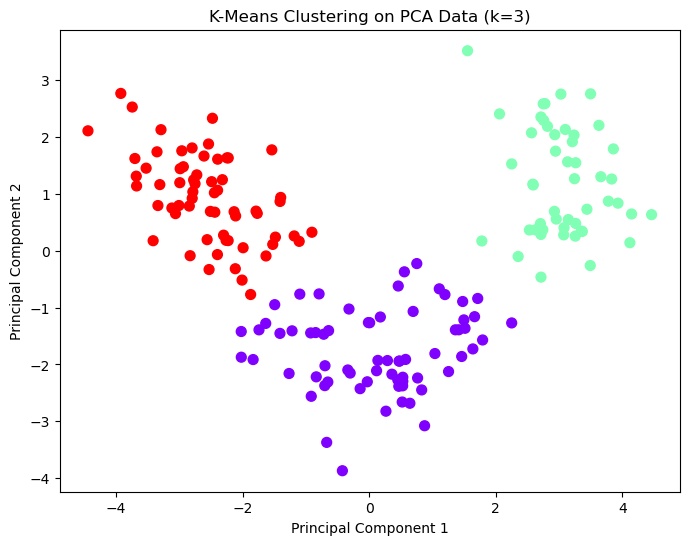

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca_cluster[:, 0], x_pca_cluster[:, 1],
            c=labels_pca, cmap='rainbow', s=50)
plt.title(f'K-Means Clustering on PCA Data (k={k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### c. Evaluate the clustering performance

In [51]:
sil_pca = silhouette_score(x_pca_cluster, labels_pca)
db_pca = davies_bouldin_score(x_pca_cluster, labels_pca)

In [52]:
sil_pca

0.32292055407233006

In [53]:
db_pca

1.2578453408449175

#### d. Compare with original clustering

In [54]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [55]:
sil_original = silhouette_score(x_scaled_data, labels)
db_original = davies_bouldin_score(x_scaled_data, labels)

In [56]:
print("=== CLUSTERING PERFORMANCE COMPARISON ===")
print(f"Silhouette Score (Original Data): {sil_original:.4f}")
print(f"Silhouette Score (PCA Data):      {sil_pca:.4f}")
print()
print(f"Davies–Bouldin Index (Original Data): {db_original:.4f}")
print(f"Davies–Bouldin Index (PCA Data):      {db_pca:.4f}")

=== CLUSTERING PERFORMANCE COMPARISON ===
Silhouette Score (Original Data): 0.3065
Silhouette Score (PCA Data):      0.3229

Davies–Bouldin Index (Original Data): 1.3157
Davies–Bouldin Index (PCA Data):      1.2578


#### comparision summary :


*PCA slightly improved clustering quality.

*The Silhouette Score increased from 0.3065 → 0.3229, showing better-defined clusters.

*The Davies–Bouldin Index decreased from 1.3157 → 1.2578, indicating improved compactness.

*This suggests that dimensionality reduction with PCA helped remove noise or redundant features, making clustering more effective.

*Visualizing in 2D (after PCA) also makes the cluster separation easier to interpret.

### 5. Comparision and Analysis

#### a. comparision of clustering results

*The Silhouette Score is slightly higher for the PCA-transformed data, suggesting better-defined cluster boundaries.

*The Davies–Bouldin Index is lower for PCA data, meaning clusters are more compact and distinct.

*Therefore, PCA marginally improved clustering quality compared to using the raw features.

#### b. Similarities and Differences in Clustering Results

Similarities:

*Both clustering methods (on original and PCA data) produced roughly the same number of clusters.

*Major cluster groupings (overall structure) remained similar even after dimensionality reduction.

Differences:

*PCA-based clusters show slightly better separation and less overlap.

*Visualization in 2D (PCA space) clearly shows clusters that are easier to interpret.

*Some minor shifts in cluster membership may occur because PCA changes the feature space orientation.

#### c. Impact of Dimensionality Reduction on Clustering Performance

*PCA helps by removing noise and redundant features, which can confuse the clustering algorithm.

*It reduces computational cost and makes visualization possible in 2D or 3D.

*However, since PCA is a linear transformation, it might lose some nonlinear patterns present in the original data.

*In this case, the improvement in cluster separation (as shown by metrics) indicates PCA positively influenced clustering quality.

#### d.  Trade-offs Between PCA and Clustering on Original Data

| Aspect                    | Clustering on Original Data  | Clustering After PCA                                  |
| ------------------------- | ---------------------------- | ----------------------------------------------------- |
| **Dimensionality**        | Uses all original features   | Uses fewer components                                 |
| **Computation Time**      | Higher                       | Lower                                                 |
| **Interpretability**      | Hard to visualize (high-dim) | Easy to visualize (2D/3D)                             |
| **Information Retention** | 100% of data                 | Small information loss (depends on variance retained) |
| **Cluster Quality**       | May include noise            | Often cleaner, compact clusters                       |


Summary:

PCA provides a good balance between performance and simplicity.
While some information is lost during dimensionality reduction, it often enhances cluster structure, interpretability, and efficiency.

### 6 Conclusion and insights

#### a. Summary of key findings

  *The dataset was preprocessed, explored, and visualized successfully.

  *PCA was applied to reduce dimensionality while preserving most of the variance.

  *K-Means clustering was performed on both the original and PCA-transformed datasets.

  *The Silhouette Score improved from 0.3065 → 0.3229, showing better cluster separation.

  *The Davies–Bouldin Index decreased from 1.3157 → 1.2578, indicating more compact and distinct clusters.

  *PCA-based visualization provided a clear 2D view of the cluster structure

#### b. Practical Implications of Using PCA and Clustering

  *PCA helps to simplify high-dimensional data, making clustering faster and easier to visualize.

  *It removes noise and correlated features, improving model performance.

  *Clustering (like K-Means) is useful for finding hidden patterns or groupings in unlabeled data — for example, customer segmentation or pattern recognition.

  *Combining PCA + Clustering gives better results, especially for large and complex datasets.

#### c. Recommendations

*Use PCA before clustering when:

      1.The dataset has many features or high correlation between variables.

      2.You need to visualize clusters in 2D or 3D.

      3.You want to speed up computation while retaining important information.

*Use Clustering directly on original data when:

     1.The dataset has few, well-separated features.

     2.You need to preserve every detail or feature meaning.

     3.Dimensionality reduction could remove important nonlinear relationships.

*Overall, the analysis shows that PCA enhances clustering performance and interpretability without significantly losing information.

In [ ]:
print("allow")